# **Importing Necessary Libraries**

In [13]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# **Importing and Visulaizing the dataset**

In [14]:
# Load the data
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')
# Extract features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values


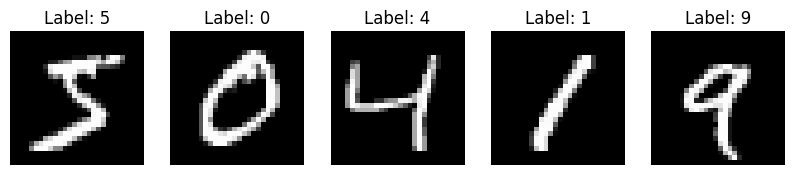

In [17]:
# Display a few sample images from the training set
def display_sample_images(X, y, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

# Display sample images before normalization and reshaping
display_sample_images(X_train, y_train)


# **Preprocessing**

In [18]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Reshape data to fit the model
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# **Building CNN Model**

In [20]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# **Compiling and Training of model**

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
# Train the model
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
54/54 [==============================] - 6s 99ms/step - loss: 1.1137 - accuracy: 0.6422 - val_loss: nan - val_accuracy: 0.9099
Epoch 2/10
54/54 [==============================] - 7s 126ms/step - loss: 0.3851 - accuracy: 0.8833 - val_loss: nan - val_accuracy: 0.9349
Epoch 3/10
54/54 [==============================] - 5s 95ms/step - loss: 0.2676 - accuracy: 0.9204 - val_loss: nan - val_accuracy: 0.9489
Epoch 4/10
54/54 [==============================] - 6s 112ms/step - loss: 0.2012 - accuracy: 0.9422 - val_loss: nan - val_accuracy: 0.9576
Epoch 5/10
54/54 [==============================] - 6s 106ms/step - loss: 0.1744 - accuracy: 0.9500 - val_loss: nan - val_accuracy: 0.9617
Epoch 6/10
54/54 [==============================] - 6s 103ms/step - loss: 0.1433 - accuracy: 0.9580 - val_loss: nan - val_accuracy: 0.9622
Epoch 7/10
54/54 [==============================] - 7s 125ms/step - loss: 0.1286 - accuracy: 0.9645 - val_loss: nan - val_accuracy: 0.9617
Epoch 8/10
54/54 [===========

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


269/269 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.9719
Test accuracy: 0.9718604683876038


In [24]:
# Save the model
model.save('handwritten_digit_recognition_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
